In [1]:
# !pip install wheel cupy numpy

In [2]:
# The dataset consists of 3 drones, and 1 background
#!ls data/DroneRF
#!tree data/backgroundrfactivities
!tree data/DroneRF

data/DroneRF
├── ardrone
│   ├── 10100H_0.csv
│   ├── 10100H_10.csv
│   ├── 10100H_11.csv
│   ├── 10100H_12.csv
│   ├── 10100H_13.csv
│   ├── 10100H_14.csv
│   ├── 10100H_15.csv
│   ├── 10100H_16.csv
│   ├── 10100H_17.csv
│   ├── 10100H_18.csv
│   ├── 10100H_19.csv
│   ├── 10100H_1.csv
│   ├── 10100H_20.csv
│   ├── 10100H_2.csv
│   ├── 10100H_3.csv
│   ├── 10100H_4.csv
│   ├── 10100H_5.csv
│   ├── 10100H_6.csv
│   ├── 10100H_7.csv
│   ├── 10100H_8.csv
│   ├── 10100H_9.csv
│   ├── 10100L_0.csv
│   ├── 10100L_10.csv
│   ├── 10100L_11.csv
│   ├── 10100L_12.csv
│   ├── 10100L_13.csv
│   ├── 10100L_14.csv
│   ├── 10100L_15.csv
│   ├── 10100L_16.csv
│   ├── 10100L_17.csv
│   ├── 10100L_18.csv
│   ├── 10100L_19.csv
│   ├── 10100L_1.csv
│   ├── 10100L_20.csv
│   ├── 10100L_2.csv
│   ├── 10100L_3.csv
│   ├── 10100L_4.csv
│   ├── 10100L_5.csv
│   ├── 10100L_6.csv
│   ├── 10100L_7.csv
│   ├── 10100L_8.csv
│   ├── 10100L_9.csv
│   ├── 10101H_0.csv
│   ├── 10101H_10.csv
│   ├── 10101H_11.csv
│   ├─

└── phantomdrone
    ├── 11000H_0.csv
    ├── 11000H_10.csv
    ├── 11000H_11.csv
    ├── 11000H_12.csv
    ├── 11000H_13.csv
    ├── 11000H_14.csv
    ├── 11000H_15.csv
    ├── 11000H_16.csv
    ├── 11000H_17.csv
    ├── 11000H_18.csv
    ├── 11000H_19.csv
    ├── 11000H_1.csv
    ├── 11000H_20.csv
    ├── 11000H_2.csv
    ├── 11000H_3.csv
    ├── 11000H_4.csv
    ├── 11000H_5.csv
    ├── 11000H_6.csv
    ├── 11000H_7.csv
    ├── 11000H_8.csv
    ├── 11000H_9.csv
    ├── 11000L_0.csv
    ├── 11000L_10.csv
    ├── 11000L_11.csv
    ├── 11000L_12.csv
    ├── 11000L_13.csv
    ├── 11000L_14.csv
    ├── 11000L_15.csv
    ├── 11000L_16.csv
    ├── 11000L_17.csv
    ├── 11000L_18.csv
    ├── 11000L_19.csv
    ├── 11000L_1.csv
    ├── 11000L_20.csv
    ├── 11000L_2.csv
    ├── 11000L_3.csv
    ├── 11000L_4.csv
    ├── 11000L_5.csv
    ├── 11000L_6.csv
    ├── 11000L_7.csv
    ├── 11000L_8.csv
    └── 11000L_9.csv

9 directories, 439 files


## Format
10100H_0.csv is the format for each segment. The filename represents the metadata, described as follows.
<img src="codes.png" alt="codes" style="width: 400px;"/>

<b>101</b>00H_0.csv

First three numbers in the filename represents the drone mode.
- Background: 000
- ardrone: 101
- bepopdrone: 100
- phantomdrone: 110


101<b>00</b>H_0.csv

4th and 5th number represents a binary for mode. There are a total of 4 modes. Available modes are 
- 1: 'On and Connected',
- 2: 'Hovering Automatically',
- 3: 'Flying no recording',
- 4: 'Flying and recording'

10100<b>H</b>_0.csv

6th character is either a H or L, the data is cut into 2 halves of 1 mil samples each.

10100H_<b>0</b>.csv

The character after the underscore represents the segment number

In [3]:
!tree data/DroneRF

data/DroneRF
├── ardrone
│   ├── 10100H_0.csv
│   ├── 10100H_10.csv
│   ├── 10100H_11.csv
│   ├── 10100H_12.csv
│   ├── 10100H_13.csv
│   ├── 10100H_14.csv
│   ├── 10100H_15.csv
│   ├── 10100H_16.csv
│   ├── 10100H_17.csv
│   ├── 10100H_18.csv
│   ├── 10100H_19.csv
│   ├── 10100H_1.csv
│   ├── 10100H_20.csv
│   ├── 10100H_2.csv
│   ├── 10100H_3.csv
│   ├── 10100H_4.csv
│   ├── 10100H_5.csv
│   ├── 10100H_6.csv
│   ├── 10100H_7.csv
│   ├── 10100H_8.csv
│   ├── 10100H_9.csv
│   ├── 10100L_0.csv
│   ├── 10100L_10.csv
│   ├── 10100L_11.csv
│   ├── 10100L_12.csv
│   ├── 10100L_13.csv
│   ├── 10100L_14.csv
│   ├── 10100L_15.csv
│   ├── 10100L_16.csv
│   ├── 10100L_17.csv
│   ├── 10100L_18.csv
│   ├── 10100L_19.csv
│   ├── 10100L_1.csv
│   ├── 10100L_20.csv
│   ├── 10100L_2.csv
│   ├── 10100L_3.csv
│   ├── 10100L_4.csv
│   ├── 10100L_5.csv
│   ├── 10100L_6.csv
│   ├── 10100L_7.csv
│   ├── 10100L_8.csv
│   ├── 10100L_9.csv
│   ├── 10101H_0.csv
│   ├── 10101H_10.csv
│   ├── 10101H_11.csv
│   ├─

In [4]:
#A typical file size of each csv is around 90M. We need an efficient way to process this.
!ls -llh data/DroneRF/ardrone/*

-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_0.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_10.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_11.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_12.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_13.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_14.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_15.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_16.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_17.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_18.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_19.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_1.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 data/DroneRF/ardrone/10100H_20.csv
-rw-rw-r-- 1 jax jax  90M Jan  3  2019 d

In [14]:
#Loading one segment for analysis
import numpy as np
ardrone_segment_18_h=np.loadtxt('data/DroneRF/ardrone/10100H_18.csv', delimiter=",")
ardrone_segment_18_l=np.loadtxt('data/DroneRF/ardrone/10100L_18.csv', delimiter=",")
ardrone_segment_9_h=np.loadtxt('data/DroneRF/ardrone/10100H_9.csv', delimiter=",")
ardrone_segment_9_l=np.loadtxt('data/DroneRF/ardrone/10100L_9.csv', delimiter=",")

print("ARDrone Segment 18 L consists of {0} freq samples with a min/max of {1}/{2}".format(ardrone_segment_18_l.shape[0],min(ardrone_segment_18_l),max(ardrone_segment_18_l)))
print("ARDrone Segment 18 H consists of {0} freq samples with a min/max of {1}/{2}".format(ardrone_segment_18_h.shape[0],min(ardrone_segment_18_h),max(ardrone_segment_18_h)))

print("ARDrone Segment 9 L consists of {0} freq samples with a min/max of {1}/{2}".format(ardrone_segment_9_l.shape[0],min(ardrone_segment_9_l),max(ardrone_segment_9_l)))
print("ARDrone Segment 9 H consists of {0} freq samples with a min/max of {1}/{2}".format(ardrone_segment_9_h.shape[0],min(ardrone_segment_9_h),max(ardrone_segment_9_h)))

ARDrone Segment 18 L consists of 10000000 freq samples with a min/max of -8338.0/8213.0
ARDrone Segment 18 H consists of 10000000 freq samples with a min/max of -220.0/182.0
ARDrone Segment 9 L consists of 10000000 freq samples with a min/max of -7892.0/8376.0
ARDrone Segment 9 H consists of 10000000 freq samples with a min/max of -206.0/203.0


In [6]:
print("Each segment consists of a upper and lower freq range, specifically")
print("2.4Ghz to 2.44Ghz and\n2.44Ghz to 2.48Ghz\n")
print("This means each sample is seperated by {0} hz".format(40*1000000/ardrone_segment_18_l.shape[0]))

Each segment consists of a upper and lower freq range, specifically
2.4Ghz to 2.44Ghz and
2.44Ghz to 2.48Ghz

This means each sample is seperated by 4.0 hz


So it would seem that for AR Drone, a L segment has a much larger amplitude variation compared to a H segment for the same mode. Lets do a check for bepopdrone.

In [7]:
#Loading one segment for analysis
import numpy as np
bepopdrone_segment_18_h=np.loadtxt('data/DroneRF/bepopdrone/10011H_18.csv', delimiter=",")
bepopdrone_segment_18_l=np.loadtxt('data/DroneRF/bepopdrone/10011L_18.csv', delimiter=",")
bepopdrone_segment_9_h=np.loadtxt('data/DroneRF/bepopdrone/10011H_9.csv', delimiter=",")
bepopdrone_segment_9_l=np.loadtxt('data/DroneRF/bepopdrone/10011L_9.csv', delimiter=",")

print("bepop drone Segment 18 L consists of {0} freq samples with a min/max of {1}/{2}".format(bepopdrone_segment_18_l.shape[0],min(bepopdrone_segment_18_l),max(bepopdrone_segment_18_l)))
print("bepop drone Segment 18 H consists of {0} freq samples with a min/max of {1}/{2}".format(bepopdrone_segment_18_h.shape[0],min(bepopdrone_segment_18_h),max(bepopdrone_segment_18_h)))

print("bepop drone Segment 9 L consists of {0} freq samples with a min/max of {1}/{2}".format(bepopdrone_segment_9_l.shape[0],min(bepopdrone_segment_9_l),max(bepopdrone_segment_9_l)))
print("bepop drone Segment 9 H consists of {0}   freq samples with a min/max of {1}/{2}".format(bepopdrone_segment_9_h.shape[0],min(bepopdrone_segment_9_h),max(bepopdrone_segment_9_h)))

bepop drone Segment 18 L consists of 10000000 freq samples with a min/max of -8964.0/9546.0
bepop drone Segment 18 H consists of 10000000 freq samples with a min/max of -243.0/234.0
bepop drone Segment 9 L consists of 10000000 freq samples with a min/max of -11469.0/11446.0
bepop drone Segment 9 H consists of 10000000   freq samples with a min/max of -245.0/235.0


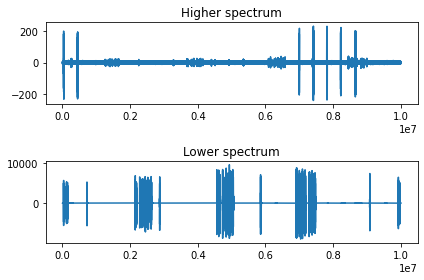

In [8]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(bepopdrone_segment_18_h)
axs[0].set_title('Higher spectrum')
axs[1].plot(bepopdrone_segment_18_l)
axs[1].set_title('Lower spectrum')
fig.tight_layout()

The lower spectrum has larger amplitude variation from higher spectrum

Now lets take a look at same drone, same spectrum and segment but a different code.

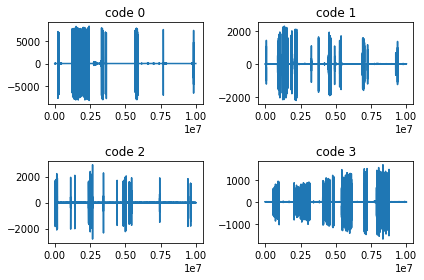

In [9]:
import numpy as np
ardrone_segment_18_l_code0=np.loadtxt('data/DroneRF/ardrone/10100L_8.csv', delimiter=",")
ardrone_segment_18_l_code1=np.loadtxt('data/DroneRF/ardrone/10101L_8.csv', delimiter=",")
ardrone_segment_18_l_code2=np.loadtxt('data/DroneRF/ardrone/10110L_8.csv', delimiter=",")
ardrone_segment_18_l_code3=np.loadtxt('data/DroneRF/ardrone/10111L_8.csv', delimiter=",")

fig, axs = plt.subplots(2,2)
axs[0][0].plot(ardrone_segment_18_l_code0)
axs[0][0].set_title('code 0')
axs[0][1].plot(ardrone_segment_18_l_code1)
axs[0][1].set_title('code 1')

axs[1][0].plot(ardrone_segment_18_l_code2)
axs[1][0].set_title('code 2')

axs[1][1].plot(ardrone_segment_18_l_code3)
axs[1][1].set_title('code 3')


fig.tight_layout()

The signals demonstrated from different codes showed that they are highly distinguishable. Now lets look at same codes from different segments.

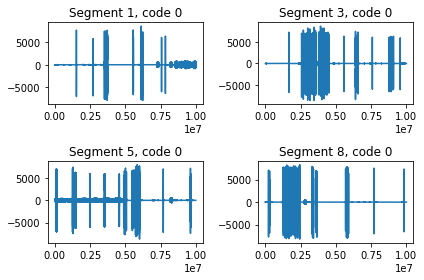

In [10]:
ardrone_segment_1_l_code0=np.loadtxt('data/DroneRF/ardrone/10100L_1.csv', delimiter=",")
ardrone_segment_3_l_code0=np.loadtxt('data/DroneRF/ardrone/10100L_3.csv', delimiter=",")
ardrone_segment_5_l_code0=np.loadtxt('data/DroneRF/ardrone/10100L_5.csv', delimiter=",")
ardrone_segment_8_l_code0=np.loadtxt('data/DroneRF/ardrone/10100L_8.csv', delimiter=",")

fig, axs = plt.subplots(2,2)
axs[0][0].plot(ardrone_segment_1_l_code0)
axs[0][0].set_title('Segment 1, code 0')
axs[0][1].plot(ardrone_segment_3_l_code0)
axs[0][1].set_title('Segment 3, code 0')

axs[1][0].plot(ardrone_segment_5_l_code0)
axs[1][0].set_title('Segment 5, code 0')

axs[1][1].plot(ardrone_segment_8_l_code0)
axs[1][1].set_title('Segment 8, code 0')


fig.tight_layout()

In [11]:
# !unrar x 'data/DroneRF/backgroundrfactivities/RF Data_00000_H1.rar'
# !mv *.csv data/DroneRF/backgroundrfactivities
# !cd  data/DroneRF/backgroundrfactivities && ls
!tree

.
├── analyse.py
├── codes.png
├── _config.yml
├── data
│   └── DroneRF
│       ├── ardrone
│       │   ├── 10100H_0.csv
│       │   ├── 10100H_10.csv
│       │   ├── 10100H_11.csv
│       │   ├── 10100H_12.csv
│       │   ├── 10100H_13.csv
│       │   ├── 10100H_14.csv
│       │   ├── 10100H_15.csv
│       │   ├── 10100H_16.csv
│       │   ├── 10100H_17.csv
│       │   ├── 10100H_18.csv
│       │   ├── 10100H_19.csv
│       │   ├── 10100H_1.csv
│       │   ├── 10100H_20.csv
│       │   ├── 10100H_2.csv
│       │   ├── 10100H_3.csv
│       │   ├── 10100H_4.csv
│       │   ├── 10100H_5.csv
│       │   ├── 10100H_6.csv
│       │   ├── 10100H_7.csv
│       │   ├── 10100H_8.csv
│       │   ├── 10100H_9.csv
│       │   ├── 10100L_0.csv
│       │   ├── 10100L_10.csv
│       │   ├── 10100L_11.csv
│       │   ├── 10100L_12.csv
│       │   ├── 10100L_13.csv
│       │   ├── 10100L_14.csv
│       │   ├── 10100L_15.csv
│       │   ├── 10100L_16.csv
│       │   ├── 10100L_17.csv
│       │   ├── 101

BackGround RF activities Segment 5 ( Time domain )

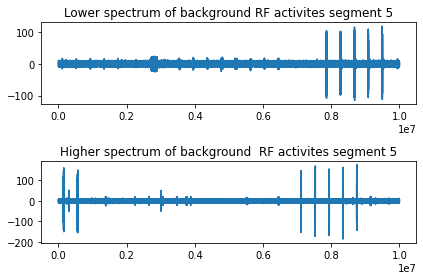

In [17]:
import numpy as np
backgroundrfactivities_segment_5_H1=np.loadtxt('data/DroneRF/backgroundrfactivities/RF Data_00000_H1/00000H_5.csv', delimiter=",")
backgroundrfactivities_segment_5_L1=np.loadtxt('data/DroneRF/backgroundrfactivities/RF Data_00000_L1/00000L_5.csv', delimiter=",")


import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[1].plot(backgroundrfactivities_segment_5_H1)
axs[1].set_title('Higher spectrum of background  RF activites segment 5')
axs[0].plot(backgroundrfactivities_segment_5_L1)
axs[0].set_title('Lower spectrum of background RF activites segment 5')
fig.tight_layout()

Bepopdrone Flying and Video Recording Segment 10 ( Time domain )

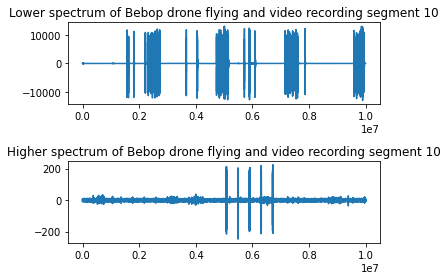

In [18]:
import numpy as np
Bebop_flying_videorecording_segment_10_H1=np.loadtxt('data/DroneRF/bepopdrone/10011H_10.csv', delimiter=",")
Bebop_flying_videorecording_segment_10_L1=np.loadtxt('data/DroneRF/bepopdrone/10011L_10.csv', delimiter=",")


import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[1].plot(Bebop_flying_videorecording_segment_10_H1)
axs[1].set_title('Higher spectrum of Bebop drone flying and video recording segment 10')
axs[0].plot(Bebop_flying_videorecording_segment_10_L1)
axs[0].set_title('Lower spectrum of Bebop drone flying and video recording segment 10')
fig.tight_layout()

Phantom Drone On and Connected Segment 7 (Time Domain)

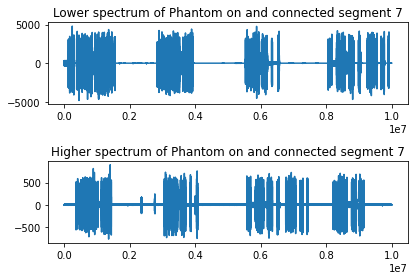

In [16]:
import numpy as np
phantom_on_and_connected_segment_7_H1=np.loadtxt('data/DroneRF/phantomdrone/11000H_7.csv', delimiter=",")
phantom_on_and_connected_segment_7_L1=np.loadtxt('data/DroneRF/phantomdrone/11000L_7.csv', delimiter=",")


import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[1].plot(phantom_on_and_connected_segment_7_H1)
axs[1].set_title('Higher spectrum of Phantom on and connected segment 7')
axs[0].plot(phantom_on_and_connected_segment_7_L1)
axs[0].set_title('Lower spectrum of Phantom on and connected segment 7')
fig.tight_layout()

FFT one RF segment

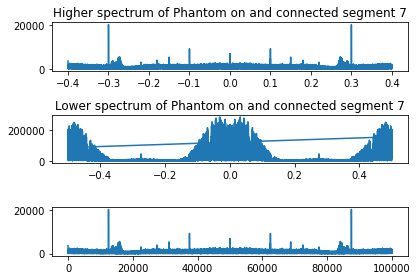

In [16]:
import numpy as np 
from numpy.fft import fft , fftfreq , ifft
import scipy.fftpack as syfp

phantom_on_seg_7_H1=np.loadtxt('data/DroneRF/phantomdrone/11000H_7.csv', delimiter=",")
phantom_on_seg_7_L1=np.loadtxt('data/DroneRF/phantomdrone/11000L_7.csv', delimiter=",")

N_of_samples = 100000
N = 100000

yf_H =np.fft.fft(phantom_on_seg_7_H1[0:N])
yf_L =np.fft.fft(phantom_on_seg_7_L1[0:N])

#fftfreq = np.fft.fftfreq(len(phantom_on_seg_7_H1[0:N]))

freqs_H = syfp.fftfreq(len(phantom_on_seg_7_H1[0:N]))
freqs_L = syfp.fftfreq(len(phantom_on_seg_7_L1[0:N]))



import matplotlib.pyplot as plt
fig, axs = plt.subplots(3)
axs[0].plot(np.linspace(-0.4 , 0.4 , N),np.abs(yf_H[0:N]))
axs[0].set_title('Higher spectrum of Phantom on and connected segment 7')

axs[1].plot(freqs_L,np.abs(yf_L[0:N]))
axs[1].set_title('Lower spectrum of Phantom on and connected segment 7')

axs[2].plot(np.abs(yf_H[0:N]))
fig.tight_layout()






In [29]:
np.abs(yf_H[0:10])

array([3599.        , 1896.24560833, 1161.47122711,  756.16478937,
        750.10923091, 1524.63382688,  577.15929445,  936.84941862,
       1105.51540464,  533.10445669])

In [30]:
yf_H[1]

(-1739.667524049847-754.5225727994542j)

Main_Data_aggregation

In [101]:
import numpy as np

#parameters

BUI =[0]*8
BUI[0] = '00000' #BUI of RF background activities
BUI[1:4] = ['10000','10001','10010','10011'] #BUI of the Bebop drone RF activities
BUI[5:8] = ['10100','10101','10110','10111'] #BUI of the AR drone RF activities
BUI[9]='11000'#BUI of the Phantom drone RF activities


Drones = {0:'backgroundrfactivities', 1:'bepopdrone', 2:'bepopdrone', 3:'bepopdrone', 4:'bepopdrone' 
          , 5:'ardrone' , 6:'ardrone' ,7:'ardrone' ,8:'ardrone' , 9: 'phantomdrone'
}

M = 2048 #Total number of frequency bins
L = 1e5 #Total number samples in a segment
Q = 10 #Number of returning points for spectral continuity

In [103]:
for i in range (len(BUI)):
    if BUI[i] == '00000':
        N = 41
        selected_drones = Drones[0]
    elif BUI[i] == '10111':
        N = 18
    else:
        N = 21
    data = []
    cnt = 1


    for k in range (N):
        print('data/DroneRF/'+ Drones[i] +'/' + str(BUI[i]) +'H_'+str(k)+'.csv')
        #x_H1=np.loadtxt('data/DroneRF/'+ Drones[i] +'/' + str(BUI[i]) +'H_'+ str(k)+'.csv', delimiter=",")
        #y_H1=np.loadtxt('data/DroneRF/'+ Drones[i] +'/' + str(BUI[i]) +'L_'+ str(k)+'.csv', delimiter=",")
        
        length = len(x_H1)
        small_RFsegments = length/L
        
        for z in range small_RFsegment:
            start = 1 + (z-1)*L
            end =  z*L
            
            xf = fft(x_H1[start:end])
            


data/DroneRF/backgroundrfactivities/00000H_0.csv
data/DroneRF/backgroundrfactivities/00000H_1.csv
data/DroneRF/backgroundrfactivities/00000H_2.csv
data/DroneRF/backgroundrfactivities/00000H_3.csv
data/DroneRF/backgroundrfactivities/00000H_4.csv
data/DroneRF/backgroundrfactivities/00000H_5.csv
data/DroneRF/backgroundrfactivities/00000H_6.csv
data/DroneRF/backgroundrfactivities/00000H_7.csv
data/DroneRF/backgroundrfactivities/00000H_8.csv
data/DroneRF/backgroundrfactivities/00000H_9.csv
data/DroneRF/backgroundrfactivities/00000H_10.csv
data/DroneRF/backgroundrfactivities/00000H_11.csv
data/DroneRF/backgroundrfactivities/00000H_12.csv
data/DroneRF/backgroundrfactivities/00000H_13.csv
data/DroneRF/backgroundrfactivities/00000H_14.csv
data/DroneRF/backgroundrfactivities/00000H_15.csv
data/DroneRF/backgroundrfactivities/00000H_16.csv
data/DroneRF/backgroundrfactivities/00000H_17.csv
data/DroneRF/backgroundrfactivities/00000H_18.csv
data/DroneRF/backgroundrfactivities/00000H_19.csv
data/Drone

In [25]:
!cd data/DroneRF/backgroundrfactivities && ls && mv 'RF Data_00000_L2'/*.csv .

 00000H_0.csv	 00000H_26.csv	 00000H_5.csv	 00000L_2.csv
 00000H_10.csv	 00000H_27.csv	 00000H_6.csv	 00000L_3.csv
 00000H_11.csv	 00000H_28.csv	 00000H_7.csv	 00000L_4.csv
 00000H_12.csv	 00000H_29.csv	 00000H_8.csv	 00000L_5.csv
 00000H_13.csv	 00000H_2.csv	 00000H_9.csv	 00000L_6.csv
 00000H_14.csv	 00000H_30.csv	 00000L_0.csv	 00000L_7.csv
 00000H_15.csv	 00000H_31.csv	 00000L_10.csv	 00000L_8.csv
 00000H_16.csv	 00000H_32.csv	 00000L_11.csv	 00000L_9.csv
 00000H_17.csv	 00000H_33.csv	 00000L_12.csv	'FR Data_00000_H2'
 00000H_18.csv	 00000H_34.csv	 00000L_13.csv	'FR Data_00000_H2.rar'
 00000H_19.csv	 00000H_35.csv	 00000L_14.csv	'RF Data_00000_H1'
 00000H_1.csv	 00000H_36.csv	 00000L_15.csv	'RF Data_00000_H1.rar'
 00000H_20.csv	 00000H_37.csv	 00000L_16.csv	'RF Data_00000_L1'
 00000H_21.csv	 00000H_38.csv	 00000L_17.csv	'RF Data_00000_L1.rar'
 00000H_22.csv	 00000H_39.csv	 00000L_18.csv	'RF Data_00000_L2'
 00000H_23.csv	 00000H_3.csv	 00000L_19.csv	'RF Data_00000_L2.rar'
 00000H_24

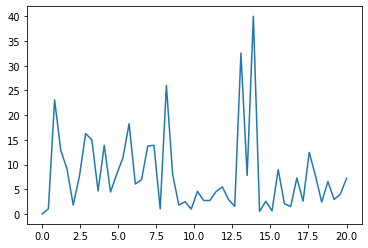

In [32]:
import numpy as np
from pylab import * 
x = np.random.rand(100) # create 100 random numbers of which we want the fourier transform
x = x - mean(x) # make sure the average is zero, so we don't get a huge DC offset.
dt = 0.1 #[s] 1/the sampling rate
fftx = np.fft.fft(x) # the frequency transformed part
# now discard anything  that we do not need..
fftx = fftx[range(int(len(fftx)/2))]
# now create the frequency axis: it runs from 0 to the sampling rate /2
freq_fftx = np.linspace(0,2/dt,len(fftx))
# and plot a power spectrum
plot(freq_fftx,abs(fftx)**2)
show()
